<a href="https://colab.research.google.com/github/davidArSo/Graph-Neural-Networks-para-la-deteccion-gradacion-y-prognosis-de-cancer-de-prostata/blob/master/Teoria_Grafos_Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

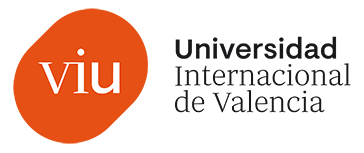

# **Graph Neural Networks para la detección, gradación y prognosis de cáncer a partir de imagen histopatológica**

#### *David Armenteros Soto*

## **Ejemplos ilustrativos de la teoría de grafos y procesamiento de señales**

In [ ]:
#Librerías
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

### **Marco Teórico**

#### **Teoría de grafos**

Definición y representación de un grafo

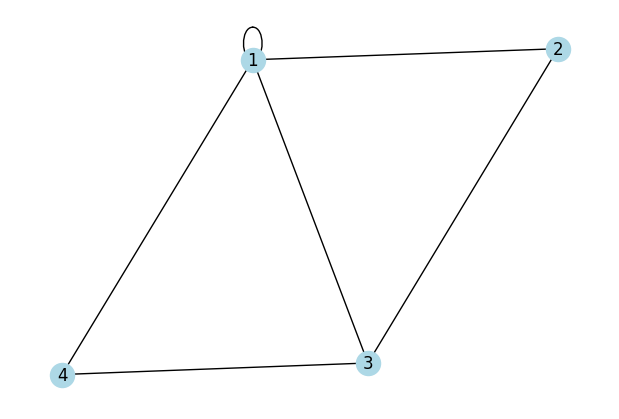

Matriz de adyacencia:
[[1 1 1 1]
 [1 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]


In [ ]:
# Definimos un grafo
G = nx.Graph()

# Agregamos los nodos
G.add_nodes_from([1, 2, 3, 4])

# Agregamos las aristas
G.add_edges_from([(1, 1), (1,2), (2,3), (3, 4), (4,1), (3,1)])

# Visualizamos el grafo
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black')
plt.show()

# Obtenemos la matriz de adyacencia
adj_matrix = nx.adjacency_matrix(G).todense()
print("Matriz de adyacencia:")
print(adj_matrix)

#### **Procesamiento de señales en grafos**

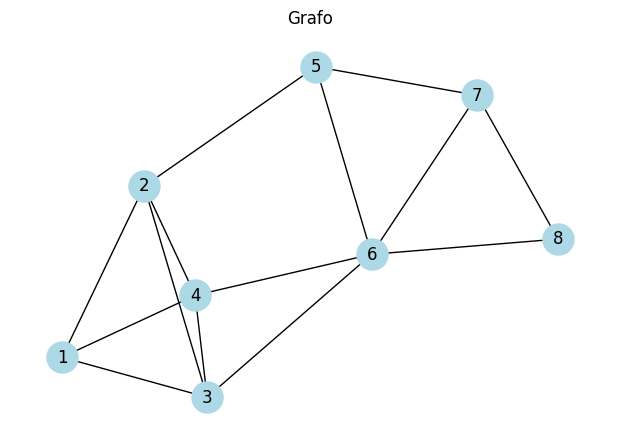

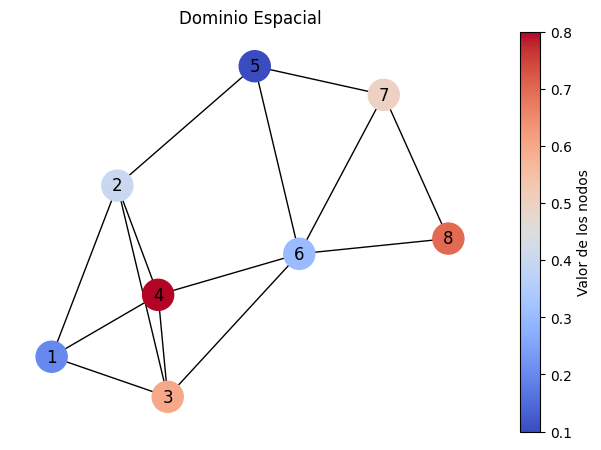

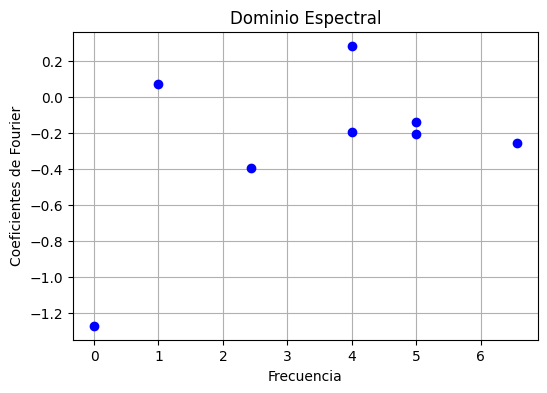

In [ ]:
# Definimos un grafo compuesto de 8 vértices y 14 conexiones
G = nx.Graph()
G.add_nodes_from(range(1, 9))
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (2, 5), (3, 4), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8)])

# Asignamos valores a cada vértice (señal)
values = [0.2, 0.4, 0.6, 0.8, 0.1, 0.3, 0.5, 0.7]
signal = dict(zip(range(1, 9), values))

# Etiquetamos los vértices con números
labels = {node: str(node) for node in G.nodes()}

# Visualizamos el grafo con las etiquetas
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='black', node_size=500)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_color='black')
plt.title('Grafo')
plt.show()

# Obtenemos la lista de colores y valores para los vértices
node_colors = [signal[node] for node in G.nodes()]
vmin = min(node_colors)
vmax = max(node_colors)

# Visualizamos el grafo en el enfoque espacial
plt.figure(figsize=(6, 4))
#cmap = cm.get_cmap('coolwarm')
cmap = cm.coolwarm
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='black', node_size=500, cmap=cmap, vmin=vmin, vmax=vmax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
plt.title('Dominio Espacial')

# Agregamos una barra de colores
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Valor de los nodos')
plt.show()

# Obtenemos la Transformada de Fourier
adj_matrix = nx.adjacency_matrix(G).todense()
laplacian = np.diag(np.sum(adj_matrix, axis=1)) - adj_matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian)

# Calculamos los coeficientes de Fourier
fourier_coefficients = eigenvectors.T.dot(np.array(list(signal.values())))

# Visualizamos el grafo en el enfoque espectral
plt.figure(figsize=(6, 4))
plt.plot(eigenvalues, fourier_coefficients, 'bo')
plt.xlabel('Frecuencia')
plt.ylabel('Coeficientes de Fourier')
plt.title('Dominio Espectral')
plt.grid(True)
plt.show()